# 🐾 Análisis de Datos del Refugio de Animales de Austin

Este notebook tiene como objetivo explorar y analizar un conjunto de datos reales del **Austin Animal Center**, el refugio de animales más grande de los Estados Unidos con política *no-kill*. Este centro recibe más de 18.000 animales por año y participa en iniciativas para la protección y el cuidado de animales abandonados, en riesgo o entregados.

Los datos proporcionados por la **Iniciativa de Datos Abiertos de la Ciudad de Austin** incluyen información sobre los resultados (adopciones, traslados, liberaciones, pérdidas, etc.) de animales desde octubre de 2013 hasta la actualidad.

En este análisis trabajaremos con la biblioteca **pandas** para limpiar, transformar y visualizar la información con fines exploratorios.

📁 Dataset: `aac_shelter_cat_outcome_eng.csv`


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("aac_shelter_cat_outcome_eng.csv")
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black


## 🔍 Exploración inicial del dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29421 entries, 0 to 29420
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age_upon_outcome      29421 non-null  object 
 1   animal_id             29421 non-null  object 
 2   animal_type           29421 non-null  object 
 3   breed                 29421 non-null  object 
 4   color                 25795 non-null  object 
 5   date_of_birth         29421 non-null  object 
 6   datetime              29421 non-null  object 
 7   monthyear             29421 non-null  object 
 8   name                  16647 non-null  object 
 9   outcome_subtype       18641 non-null  object 
 10  outcome_type          29418 non-null  object 
 11  sex_upon_outcome      29421 non-null  object 
 12  count                 29421 non-null  int64  
 13  sex                   29421 non-null  object 
 14  Spay/Neuter           29421 non-null  object 
 15  Periods            

In [3]:
df.describe(include='all')

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
count,29421,29421,29421,29421,25795,29421,29421,29421,16647,18641,...,29421,29421.000000,29421,52,29421,29421,19155,29421,10354,29421
unique,45,28209,1,65,154,4080,21927,21927,7409,17,...,7,NaN,41,14,2,2,9,40,19,44
top,2 months,A697910,Cat,domestic shorthair,brown,2015-04-28 00:00:00,2015-08-11 00:00:00,2015-08-11T00:00:00,Bella,Partner,...,Saturday,NaN,domestic shorthair,domestic shorthair,False,True,tabby,black,white,black
freq,5935,5,29421,23720,4462,68,25,25,56,9486,...,5151,NaN,23728,21,27678,27720,13613,7020,8617,7020
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.005778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.863269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ❓ Revisión de valores faltantes

In [4]:
df.isna().sum().sort_values(ascending=False)

,0
breed2,29369
color2,19067
name,12774
outcome_subtype,10780
coat_pattern,10266
color,3626
outcome_type,3
animal_id,0
age_upon_outcome,0
breed,0


## 🧼 Limpieza básica de datos

In [5]:
# Eliminar columnas poco informativas si las hubiera
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Renombrar columnas para mayor claridad
df = df.rename(columns={
    "animal_id": "ID",
    "name": "Nombre",
    "date_of_birth": "FechaNacimiento",
    "outcome_type": "TipoResultado",
    "outcome_subtype": "SubtipoResultado",
    "animal_type": "TipoAnimal",
    "sex_upon_outcome": "Sexo",
    "age_upon_outcome": "Edad",
    "breed": "Raza",
    "color": "Color"
})

df.head()

,Edad,ID,TipoAnimal,Raza,Color,FechaNacimiento,datetime,monthyear,Nombre,SubtipoResultado,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black


## 📊 Distribución de resultados de los animales

/tmp/ipython-input-6-3628745631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TipoResultado', order=df['TipoResultado'].value_counts().index, palette='viridis')


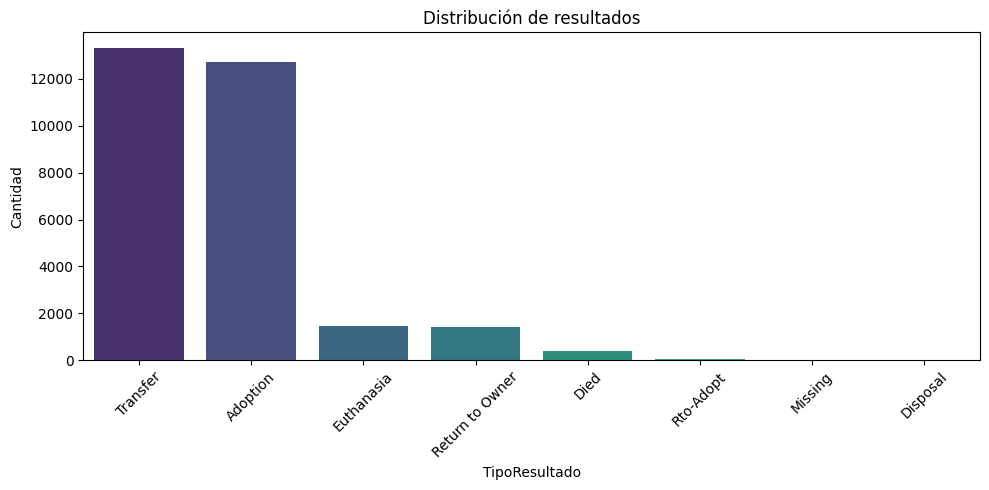

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='TipoResultado', order=df['TipoResultado'].value_counts().index, palette='viridis')
plt.title("Distribución de resultados")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🐱🐶 ¿Qué tipo de animales se registran con más frecuencia?

/tmp/ipython-input-7-786027994.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TipoAnimal', palette='Set2')


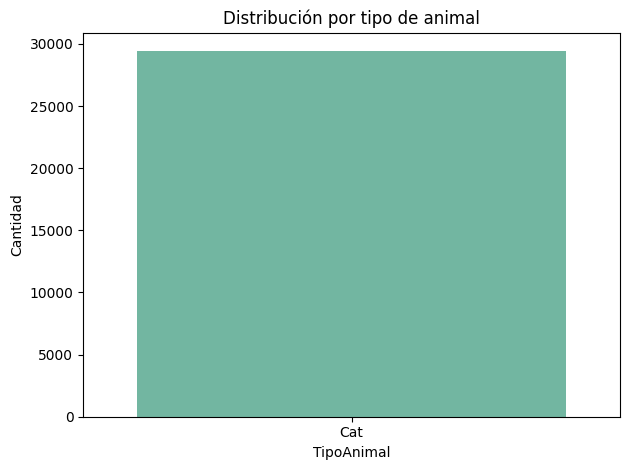

In [7]:
sns.countplot(data=df, x='TipoAnimal', palette='Set2')
plt.title("Distribución por tipo de animal")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

## ⚥ Relación entre el sexo y el resultado del animal

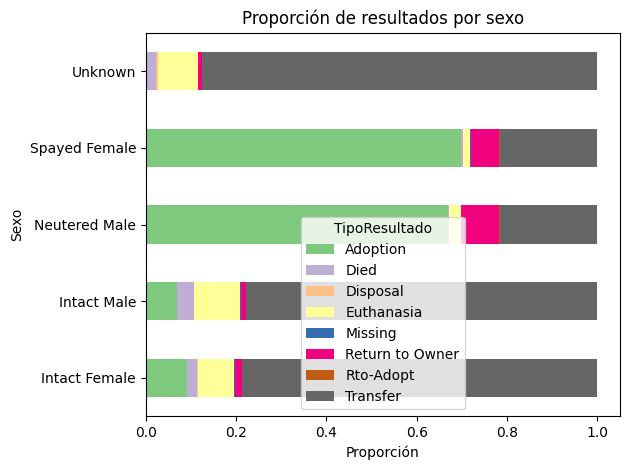

In [8]:
pd.crosstab(df['Sexo'], df['TipoResultado'], normalize='index').plot(kind='barh', stacked=True, colormap='Accent')
plt.title("Proporción de resultados por sexo")
plt.xlabel("Proporción")
plt.tight_layout()
plt.show()

## ⌛ ¿Qué edades tienen los animales al momento del resultado?

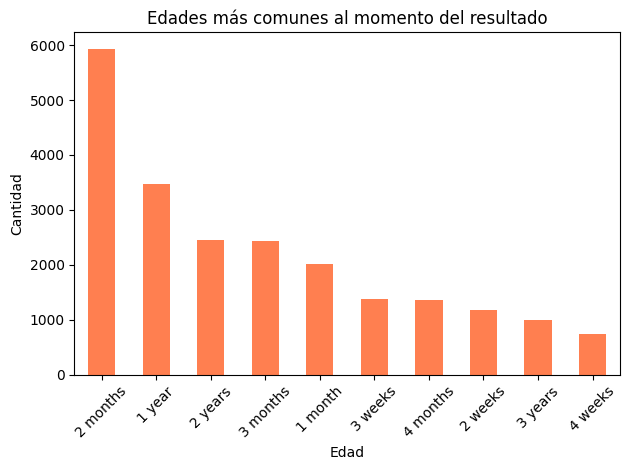

In [9]:
df['Edad'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Edades más comunes al momento del resultado")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🧪 Actividades prácticas y desafíos

A continuación se presentan algunos ejercicios para que pongas en práctica lo aprendido y explores más a fondo el dataset:

1. **Filtrar por especie:** Mostrá sólo los registros correspondientes a gatos (`Cat`). ¿Cuántos hay en total?

2. **Top razas:** ¿Cuáles son las 5 razas más comunes en el dataset? Representalo en un gráfico de barras.

3. **Animales con nombre:** ¿Qué proporción de animales tiene nombre? Representalo con un gráfico de torta.

4. **Resultados por raza dominante:** Analizá si hay razas que tienen mayores tasas de adopción. Filtrá las 10 razas más frecuentes y compará los resultados.

5. **Edad más común:** ¿Cuál es la edad al momento del resultado más frecuente para los animales adoptados?

6. **Nombres más comunes:** ¿Cuáles son los 10 nombres de animales más comunes en el dataset?

7. **Cruza o no cruza:** Agregá una nueva columna que indique si el animal es de raza pura o mestizo, en base a la columna de raza (`Raza`).

8. **Tendencia de adopciones:** Convertí la columna de fecha de nacimiento a datetime y tratá de analizar si hay alguna relación entre el año de nacimiento y la probabilidad de adopción.

9. **Relación entre edad y resultado:** Explorá si existe una diferencia en el tipo de resultado según la edad del animal.

10. **Exportar datos filtrados:** Filtrá los animales que fueron adoptados y guardalos en un nuevo archivo CSV llamado `adoptados.csv`.

---

> 💡 ¡Podés utilizar todas las herramientas de pandas que practicamos: filtros, agrupaciones, gráficos, funciones lambda, creación de columnas nuevas y más!


1. Filtrar por especie: Mostrá sólo los registros correspondientes a gatos (Cat). ¿Cuántos hay en total?

In [10]:
# Filtrar solo los registros de gatos
gatos = df[df['TipoAnimal'] == 'Cat']

# Contar el total de registros
total_gatos = len(gatos)

print(f"Total de registros de gatos: {total_gatos}")

Total de registros de gatos: 29421


2. Top razas: ¿Cuáles son las 5 razas más comunes en el dataset? Representalo en un gráfico de barras.

Top 5 razas más comunes:
Raza
domestic shorthair     23720
domestic mediumhair     2454
domestic longhair       1273
siamese                 1058
american shorthair       211
Name: count, dtype: int64


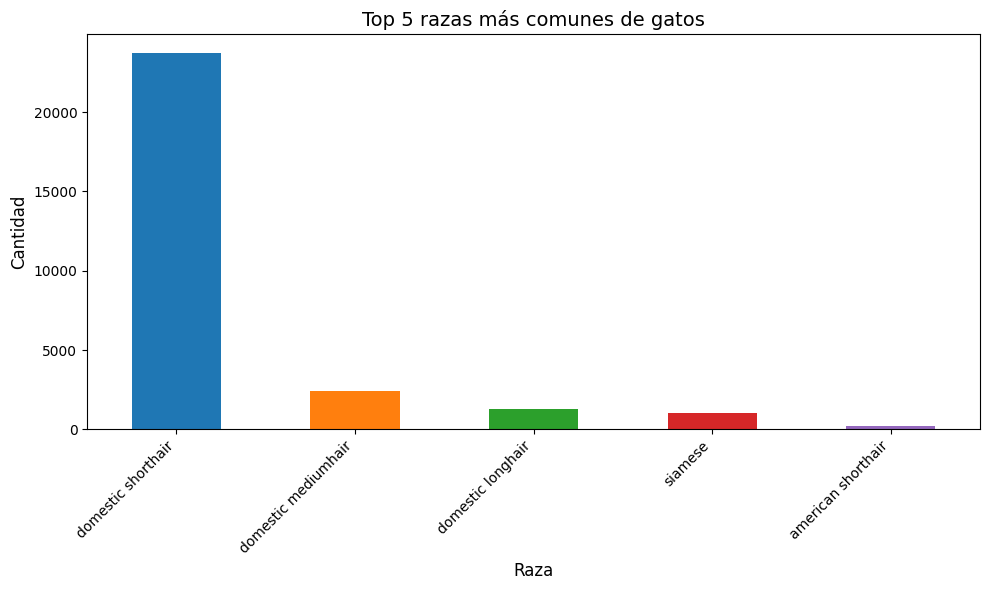

In [11]:
# Contar la frecuencia de cada raza
razas_counts = df['Raza'].value_counts().head(5)

# Mostrar las 5 razas más comunes
print("Top 5 razas más comunes:")
print(razas_counts)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
razas_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Top 5 razas más comunes de gatos', fontsize=14)
plt.xlabel('Raza', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3. Animales con nombre: ¿Qué proporción de animales tiene nombre? Representalo con un gráfico de torta.

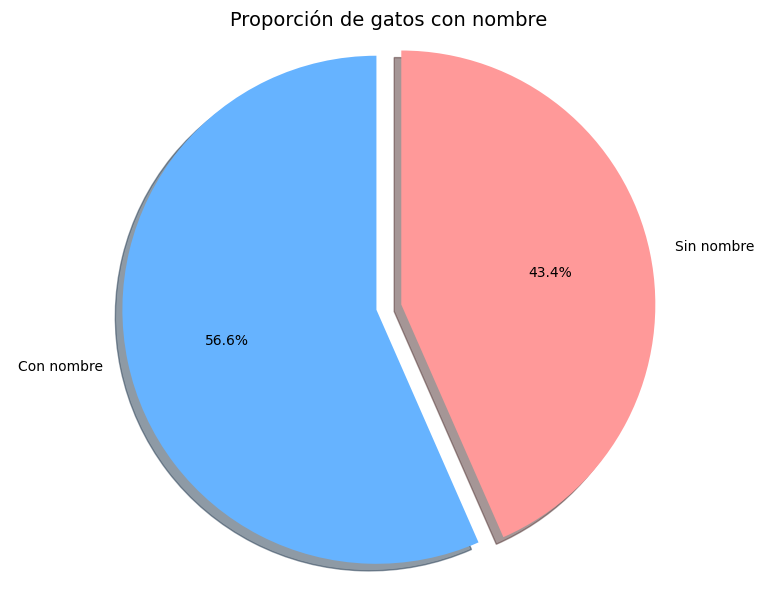

Gatos con nombre: 16647
Gatos sin nombre: 12774
Proporción: 56.6% con nombre vs 43.4% sin nombre


In [12]:
# Calcular la proporción de gatos con nombre
con_nombre = df['Nombre'].notna().sum()
sin_nombre = len(df) - con_nombre

# Crear los datos para el gráfico
datos = [con_nombre, sin_nombre]
etiquetas = ['Con nombre', 'Sin nombre']
colores = ['#66b3ff', '#ff9999']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(datos, labels=etiquetas, colors=colores, autopct='%1.1f%%',
        startangle=90, shadow=True, explode=(0.1, 0))
plt.title('Proporción de gatos con nombre', fontsize=14)
plt.axis('equal')  # Para que el gráfico sea circular

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar los valores absolutos
print(f"Gatos con nombre: {con_nombre}")
print(f"Gatos sin nombre: {sin_nombre}")
print(f"Proporción: {con_nombre/len(df)*100:.1f}% con nombre vs {sin_nombre/len(df)*100:.1f}% sin nombre")

4. Resultados por raza dominante: Analizá si hay razas que tienen mayores tasas de adopción. Filtrá las 10 razas más frecuentes y compará los resultados.

Tasas de adopción por raza (top 10):
                     Total  Adopciones  Tasa_Adopcion
Raza                                                 
manx                    80          45      56.250000
maine coon             116          62      53.448276
russian blue            69          35      50.724638
snowshoe               156          75      48.076923
domestic longhair     1273         605      47.525530
siamese               1058         492      46.502836
domestic mediumhair   2454        1112      45.313773
domestic shorthair   23720       10080      42.495784
himalayan               38          16      42.105263
american shorthair     211          77      36.492891


/tmp/ipython-input-13-1447803428.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_adopcion.index, y=tasa_adopcion.values, palette='viridis')


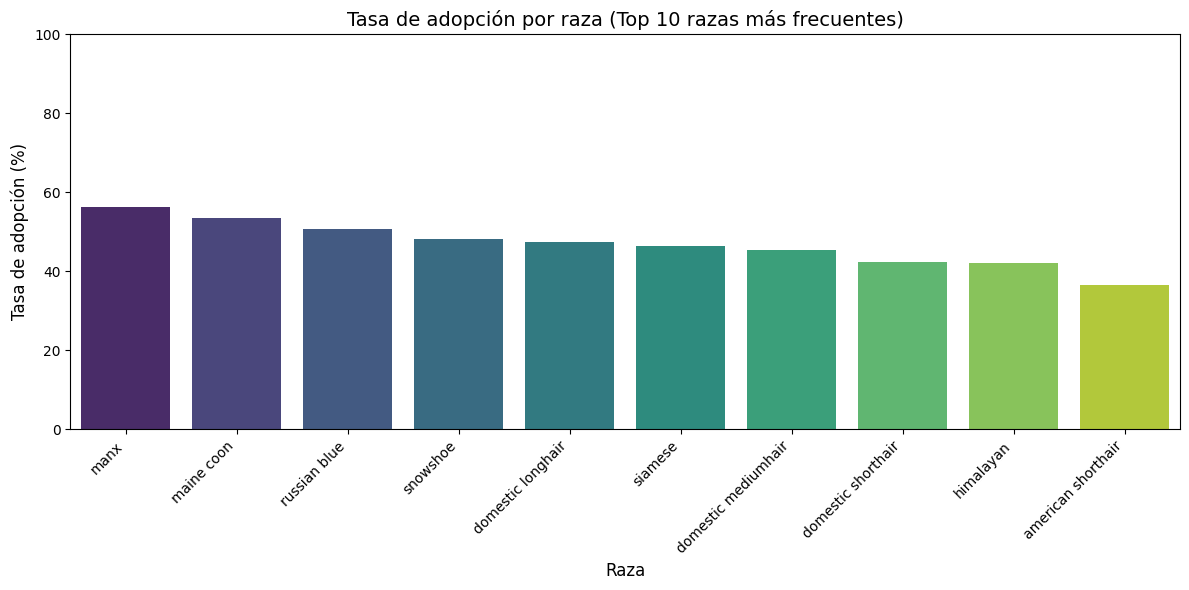

In [13]:
# 1. Filtrar las 10 razas más frecuentes
top_10_razas = df['Raza'].value_counts().head(10).index

# 2. Filtrar el dataframe solo con estas razas
df_top_razas = df[df['Raza'].isin(top_10_razas)]

# 3. Calcular tasas de adopción por raza
adopciones_por_raza = df_top_razas[df_top_razas['TipoResultado'] == 'Adoption'].groupby('Raza').size()
total_por_raza = df_top_razas.groupby('Raza').size()
tasa_adopcion = (adopciones_por_raza / total_por_raza * 100).sort_values(ascending=False)

# 4. Crear dataframe con los resultados
resultados_adopcion = pd.DataFrame({
    'Total': total_por_raza,
    'Adopciones': adopciones_por_raza,
    'Tasa_Adopcion': tasa_adopcion
}).fillna(0).sort_values('Tasa_Adopcion', ascending=False)

# 5. Mostrar resultados en tabla
print("Tasas de adopción por raza (top 10):")
print(resultados_adopcion)

# 6. Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x=tasa_adopcion.index, y=tasa_adopcion.values, palette='viridis')
plt.title('Tasa de adopción por raza (Top 10 razas más frecuentes)', fontsize=14)
plt.xlabel('Raza', fontsize=12)
plt.ylabel('Tasa de adopción (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

5. Edad más común: ¿Cuál es la edad al momento del resultado más frecuente para los animales adoptados?

Edad más común al momento de adopción: 0.1643835616438356 años
Frecuencia: 4974 casos


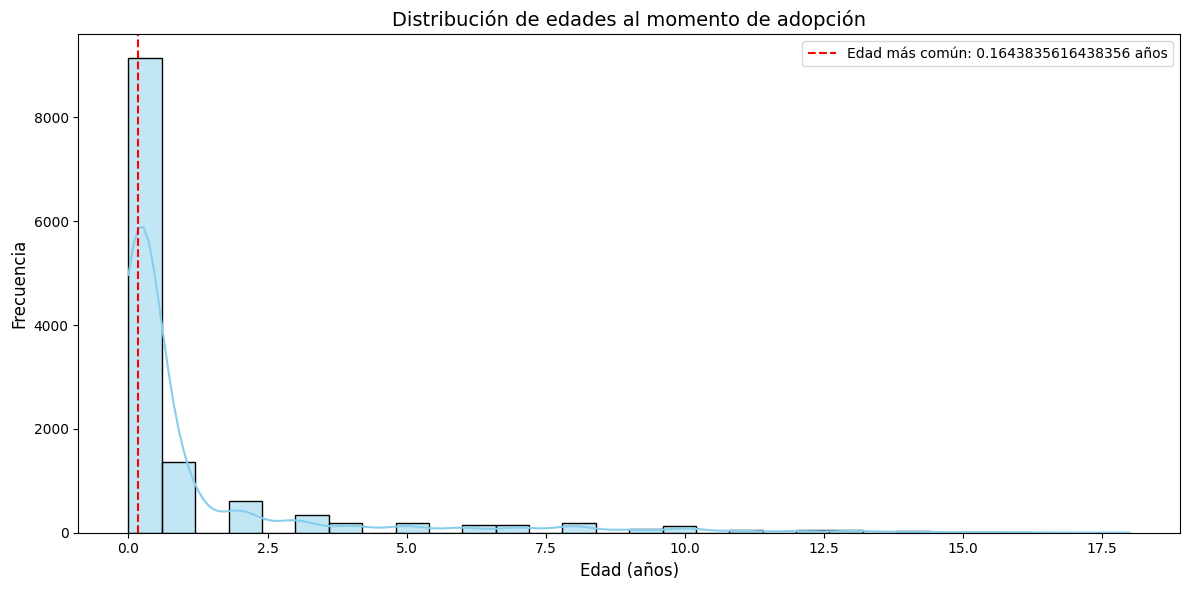

In [14]:
# 1. Filtrar solo adopciones
adopciones = df[df['TipoResultado'] == 'Adoption']

# 2. Extraer la edad en años (usando la columna 'outcome_age_(years)')
edad_adopcion = adopciones['outcome_age_(years)']

# 3. Calcular estadísticas
edad_mas_comun = edad_adopcion.mode()[0]
frecuencia = edad_adopcion.value_counts().max()

print(f"Edad más común al momento de adopción: {edad_mas_comun} años")
print(f"Frecuencia: {frecuencia} casos")

# 4. Visualizar distribución
plt.figure(figsize=(12, 6))
sns.histplot(edad_adopcion, bins=30, kde=True, color='skyblue')
plt.axvline(edad_mas_comun, color='red', linestyle='--', label=f'Edad más común: {edad_mas_comun} años')
plt.title('Distribución de edades al momento de adopción', fontsize=14)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

6. Nombres más comunes: ¿Cuáles son los 10 nombres de animales más comunes en el dataset?

Top 10 nombres más comunes:
Nombre
Charlie    81
Luna       67
Bella      63
Lucy       61
Tiger      54
Lily       54
Oliver     53
Kitty      49
Max        49
Smokey     49


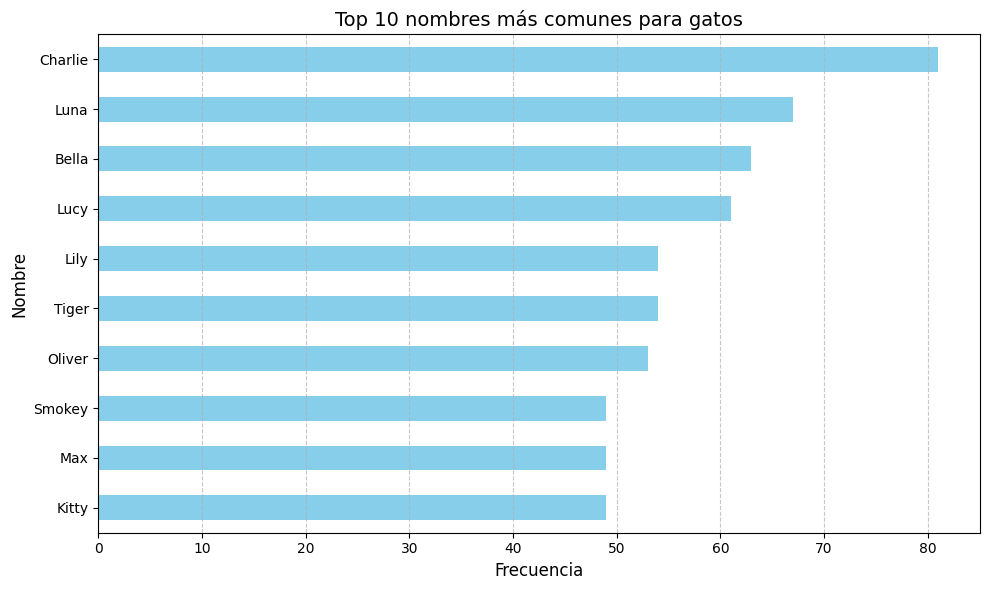

In [15]:
# Filtrar gatos con nombre (excluyendo NaN y nombres vacíos)
gatos_con_nombre = df[df['Nombre'].notna() & (df['Nombre'] != '')]

# Contar los nombres más comunes (excluyendo nombres con asterisco)
nombres_comunes = (gatos_con_nombre['Nombre']
                   .str.replace('*', '')  # Eliminar asteriscos
                   .str.strip()           # Eliminar espacios
                   .value_counts()
                   .head(10))

# Mostrar tabla de resultados
print("Top 10 nombres más comunes:")
print(nombres_comunes.to_string())

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
nombres_comunes.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 nombres más comunes para gatos', fontsize=14)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Nombre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

7. Cruza o no cruza: Agregá una nueva columna que indique si el animal es de raza pura o mestizo, en base a la columna de raza (Raza).

In [16]:
# Función para clasificar la pureza de raza
def clasificar_pureza(raza):
    # Consideramos razas puras a las que no son "domestic" y tienen nombre específico
    razas_puras = ['siamese', 'russian blue', 'ragdoll', 'manx', 'snowshoe']

    # Convertir a minúsculas y buscar coincidencias
    raza_lower = str(raza).lower()

    # Verificar si contiene alguna de las razas puras
    if any(pura in raza_lower for pura in razas_puras):
        return 'Pura'
    elif 'domestic' in raza_lower:
        return 'Mestizo'
    else:
        return 'Mestizo'  # Por defecto para otros casos

# Crear nueva columna
df['PurezaRaza'] = df['Raza'].apply(clasificar_pureza)

# Verificar distribución
distribucion_pureza = df['PurezaRaza'].value_counts(normalize=True) * 100

print("\nDistribución de pureza de raza:")
print(distribucion_pureza)

# Mostrar algunos ejemplos
print("\nEjemplos de clasificación:")
print(df[['Raza', 'PurezaRaza']].sample(5))


Distribución de pureza de raza:
PurezaRaza
Mestizo    95.163319
Pura        4.836681
Name: proportion, dtype: float64

Ejemplos de clasificación:
                          Raza PurezaRaza
7616       domestic mediumhair    Mestizo
8628        domestic shorthair    Mestizo
20903       domestic shorthair    Mestizo
2153        domestic shorthair    Mestizo
20533  domestic shorthair/manx       Pura


8. Tendencia de adopciones: Convertí la columna de fecha de nacimiento a datetime y tratá de analizar si hay alguna relación entre el año de nacimiento y la probabilidad de adopción.

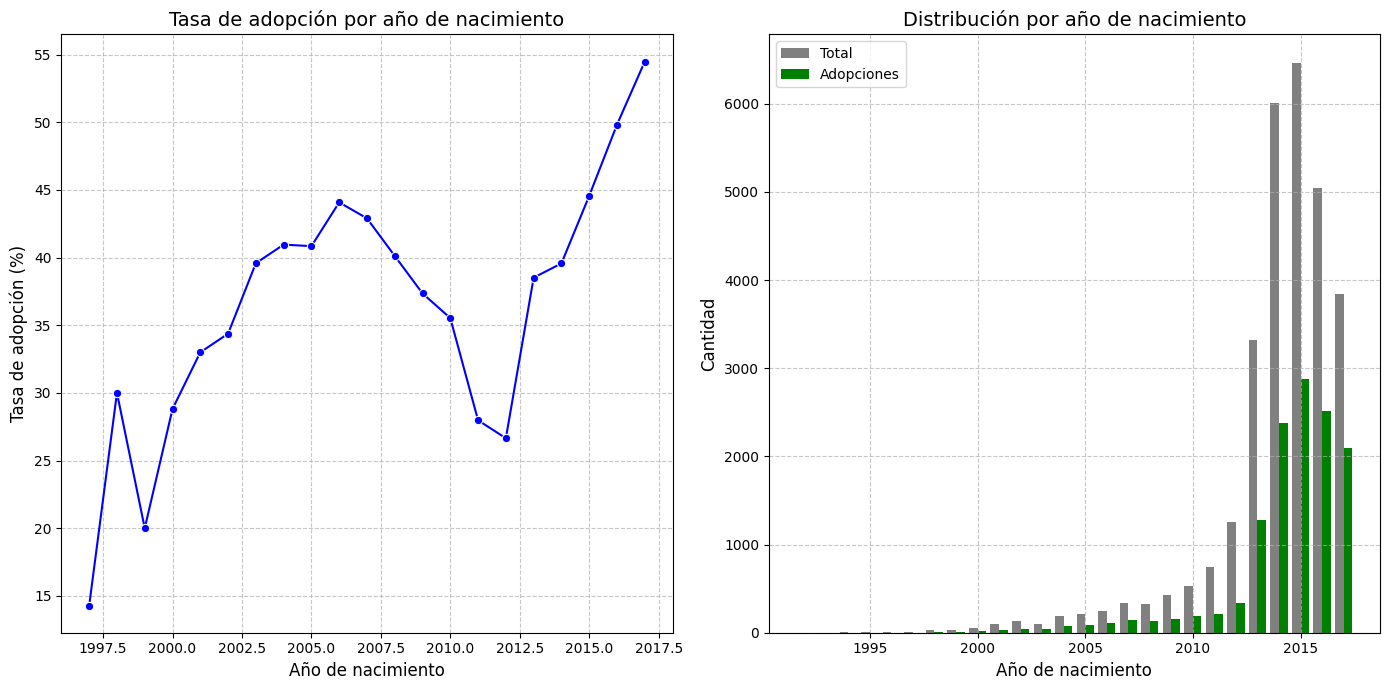


Correlación entre año de nacimiento y tasa de adopción: 0.66


In [17]:
from datetime import datetime

# 1. Convertir la columna de fecha de nacimiento a datetime
df['FechaNacimiento'] = pd.to_datetime(df['FechaNacimiento'])

# 2. Extraer el año de nacimiento
df['AñoNacimiento'] = df['FechaNacimiento'].dt.year

# 3. Filtrar solo adopciones y contar por año
adopciones = df[df['TipoResultado'] == 'Adoption']
conteo_adopciones = adopciones['AñoNacimiento'].value_counts().sort_index()

# 4. Contar total de animales por año de nacimiento
conteo_total = df['AñoNacimiento'].value_counts().sort_index()

# 5. Calcular tasa de adopción por año
tasa_adopcion = (conteo_adopciones / conteo_total * 100).dropna()

# 6. Visualización
plt.figure(figsize=(14, 7))

# Gráfico de líneas para la tasa de adopción
plt.subplot(1, 2, 1)
sns.lineplot(x=tasa_adopcion.index, y=tasa_adopcion.values, marker='o', color='b')
plt.title('Tasa de adopción por año de nacimiento', fontsize=14)
plt.xlabel('Año de nacimiento', fontsize=12)
plt.ylabel('Tasa de adopción (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfico de barras para conteo total vs adopciones
plt.subplot(1, 2, 2)
width = 0.4
plt.bar(conteo_total.index-width/2, conteo_total.values, width, label='Total', color='gray')
plt.bar(conteo_adopciones.index+width/2, conteo_adopciones.values, width, label='Adopciones', color='green')
plt.title('Distribución por año de nacimiento', fontsize=14)
plt.xlabel('Año de nacimiento', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Mostrar correlación entre año y tasa de adopción
correlacion = tasa_adopcion.reset_index().corr().iloc[0,1]
print(f"\nCorrelación entre año de nacimiento y tasa de adopción: {correlacion:.2f}")

Relación positiva moderadamente fuerte
Existe una tendencia clara: a mayor año de nacimiento (gatos más jóvenes), mayores tasas de adopción.
El valor de 0.66 está relativamente cerca de 1, lo que indica que la relación es significativa pero no perfecta.

9. Relación entre edad y resultado: Explorá si existe una diferencia en el tipo de resultado según la edad del animal.

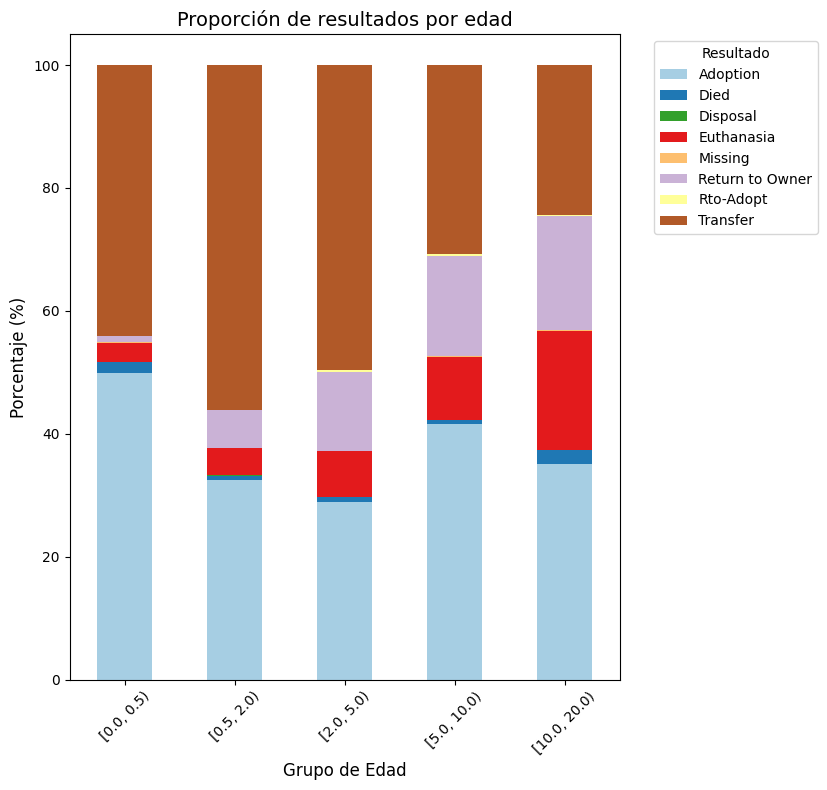


Test Chi-cuadrado de independencia:
Chi2 = 3600.2, p-valor = 0.000
Hay una relación significativa entre edad y tipo de resultado


In [25]:
df['EdadAños'] = df['outcome_age_(years)']  # Usamos la columna de edad en años ya existente

# 2. Crear categorías de edad
bins = [0, 0.5, 2, 5, 10, 20]
df['GrupoEdad'] = pd.cut(df['EdadAños'], bins=bins, right=False)

# 3. Calcular distribución de resultados por grupo de edad
resultados_por_edad = pd.crosstab(df['GrupoEdad'], df['TipoResultado'], normalize='index') * 100

# 4. Visualización
plt.figure(figsize=(14, 8))

# Gráfico de barras apiladas
plt.subplot(1, 2, 2)
resultados_por_edad.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca())
plt.title('Proporción de resultados por edad', fontsize=14)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend(title='Resultado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

'''El Chi-cuadrado de Pearson (o prueba de Chi-cuadrado) es una prueba estadística que se usa para determinar
  si existe una diferencia significativa entre las frecuencias observadas y las esperadas en una o más categorías.
  Es especialmente útil para analizar variables categóricas (por ejemplo, género, preferencia, presencia/ausencia, etc.).'''

# 5. Análisis estadístico (Chi-cuadrado de Pearson)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['GrupoEdad'], df['TipoResultado']))
print(f"\nTest Chi-cuadrado de independencia:")
print(f"Chi2 = {chi2:.1f}, p-valor = {p:.3f}")
print("Hay una relación significativa entre edad y tipo de resultado" if p < 0.05 else "No hay relación significativa")


* La adopción disminuye con la edad.
* La eutanasia aumenta con la edad (especialmente >5 años).
* Transferencias comunes en todas las edades.



10. Exportar datos filtrados: Filtrá los animales que fueron adoptados y guardalos en un nuevo archivo CSV llamado adoptados.csv

In [26]:
# Filtrar solo los registros de animales adoptados
adoptados = df[df['TipoResultado'] == 'Adoption']

# Exportar a CSV (sin incluir el índice)
adoptados.to_csv('adoptados.csv', index=False)

print(f"Se exportaron {len(adoptados)} registros de animales adoptados a 'adoptados.csv'")

Se exportaron 12732 registros de animales adoptados a 'adoptados.csv'
